In [93]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 30]
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import collections
%matplotlib inline

In [2]:
DATASET_LOCATION = '/Users/yuchao/Desktop/courses/datavisualization/crime.csv'
PICKLE_PATH = 'pickles'

In [3]:
def pickled(pickle_name):
    def inner_function(func):
        def wrapper(*args, **kwargs):
            path = os.path.join(PICKLE_PATH, pickle_name)
            if os.path.exists(path):
                with open(path, "rb") as f:
                    result = pickle.load(f)
            else:
                result = func(*args, **kwargs)
                with open(path, "ab") as f:
                    pickle.dump(result, f)
            return result
        return wrapper
    return inner_function

In [4]:
@pickled("ex2_data")
def get_data():
     return pd.read_csv(DATASET_LOCATION)

In [5]:
df = get_data()
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4075398065020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215019,160648742,NON-CRIMINAL,AIDED CASE,Thursday,08/11/2016,18:36,SOUTHERN,NONE,0 Block of WASHBURN ST,-122.414406,37.775236,POINT (-122.41440629479061 37.77523622314656),16064874251040
2215020,160659761,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,08/15/2016,19:06,BAYVIEW,"ARREST, BOOKED",16TH ST / 3RD ST,-122.389103,37.766904,POINT (-122.38910303281254 37.76690372519212),16065976165016
2215021,170285083,VEHICLE THEFT,STOLEN TRUCK,Thursday,04/06/2017,23:30,PARK,NONE,800 Block of HAIGHT ST,-122.436214,37.771317,POINT (-122.43621442698411 37.77131718410027),17028508307025
2215022,160684605,LOITERING,LODGING IN PARK,Wednesday,08/24/2016,07:33,NORTHERN,NONE,1600 Block of BAY ST,-122.434155,37.802896,POINT (-122.43415507683311 37.80289596016211),16068460519062


## Part 3: Logarithmic plots

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise*: Logarithms and plots

> * First, we'll simply create a version of [this plot](https://raw.githubusercontent.com/suneman/socialdataanalysis2019/master/files/categories.png) from Lecture 1, where you display the $y$-axis on log-scale.
> * Let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in san francisco. Let's see if I'm right. 
>   - Step 1: Divide San Francisco into a grid roughly $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so lat lon aren't really squares, but if setting up a true grid of distances seems like too much work, it's OK to just use fractions of lat/lon as bin-edges [even though those aren't completely square](https://gis.stackexchange.com/questions/173926/whats-wrong-in-using-latitude-and-longitude-as-x-and-y-on-a-cartesian-space). 
>   - Step 2: Count the number of thefts occurring within each grid-square (use all data for all time).
>   - Step 3: Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, exercise 3](https://nbviewer.jupyter.org/github/suneman/socialgraphs2019/blob/master/lectures/Week2.ipynb) in my social graphs course.
>   - Step 4: Plot the distribution of $k+1$ vs $N(k)$ on linear axes.
>   - Step 5: Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.
>   - Step 6: Answer the question: Was Sune correct in assuming that there is a power-law distribution of theft?

<BarContainer object of 39 artists>

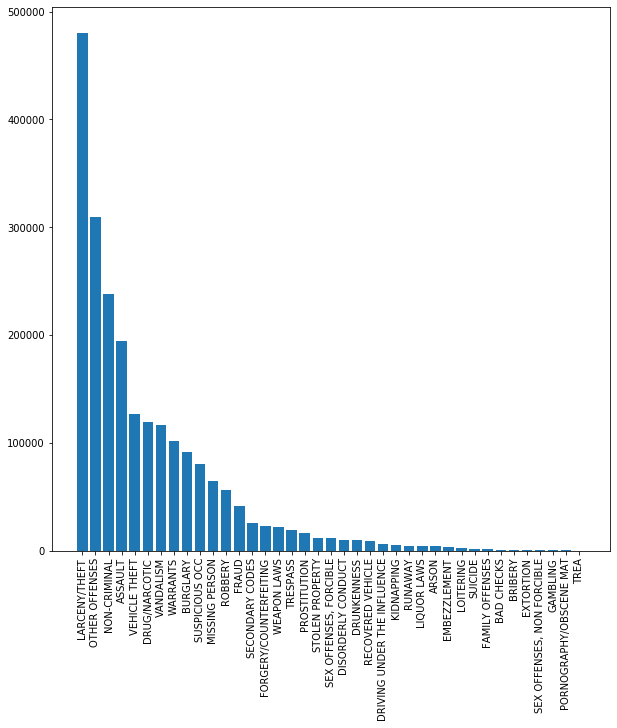

In [91]:
plt.rcParams['figure.figsize'] = [10,10]
crime_number = df.Category.value_counts()
plt.xticks(rotation = 90)
plt.bar(crime_number.index,crime_number.values)

In [7]:
df = df[df.Y != 90.0]
df_theft = df[df.Category == 'LARCENY/THEFT']
df = df.reset_index(drop = True)
df_theft = df_theft.reset_index(drop = True)

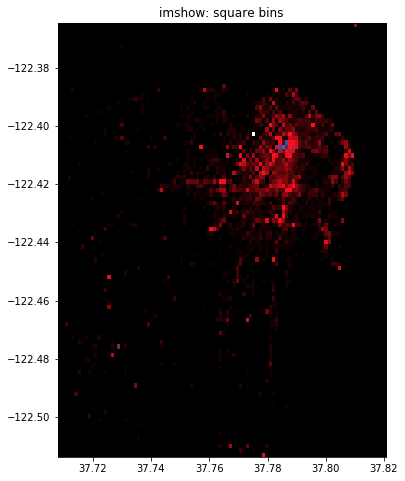

In [8]:
def get_hist_2d(latitude,longitude):
    
    H, xedges, yedges = np.histogram2d(latitude,longitude,bins=[100,100])
    H = H.T
    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(131, title='imshow: square bins')
    plt.imshow(H, cmap= 'gist_stern',interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    
    
    return H

H = get_hist_2d(df_theft.Y,df_theft.X)


In [9]:
H = H.flatten().tolist()
def all_list(arr):
    result = {}
    for i in set(arr):
        result[i] = arr.count(i)
    return result

dict = all_list(H)
dict = collections.OrderedDict(sorted(dict.items()))

In [10]:
Cmax = max(H)
dict

OrderedDict([(0.0, 4421),
             (1.0, 100),
             (2.0, 92),
             (3.0, 100),
             (4.0, 98),
             (5.0, 119),
             (6.0, 115),
             (7.0, 128),
             (8.0, 124),
             (9.0, 125),
             (10.0, 125),
             (11.0, 120),
             (12.0, 131),
             (13.0, 133),
             (14.0, 137),
             (15.0, 119),
             (16.0, 126),
             (17.0, 126),
             (18.0, 96),
             (19.0, 96),
             (20.0, 104),
             (21.0, 87),
             (22.0, 87),
             (23.0, 88),
             (24.0, 68),
             (25.0, 75),
             (26.0, 67),
             (27.0, 83),
             (28.0, 62),
             (29.0, 63),
             (30.0, 51),
             (31.0, 61),
             (32.0, 51),
             (33.0, 63),
             (34.0, 40),
             (35.0, 32),
             (36.0, 47),
             (37.0, 40),
             (38.0, 46),
             (39.

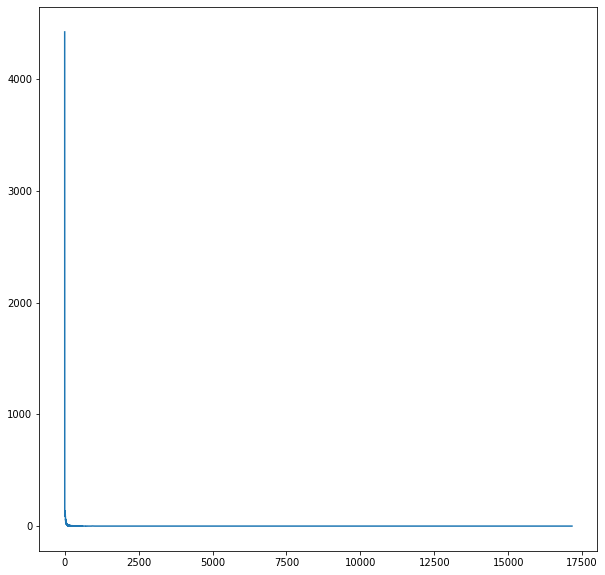

In [11]:
plt.rcParams['figure.figsize'] = [10, 10]
lst_keys = list(dict.keys())
lst = [i + 1 for i in lst_keys]
plt.plot(lst,list(dict.values()))

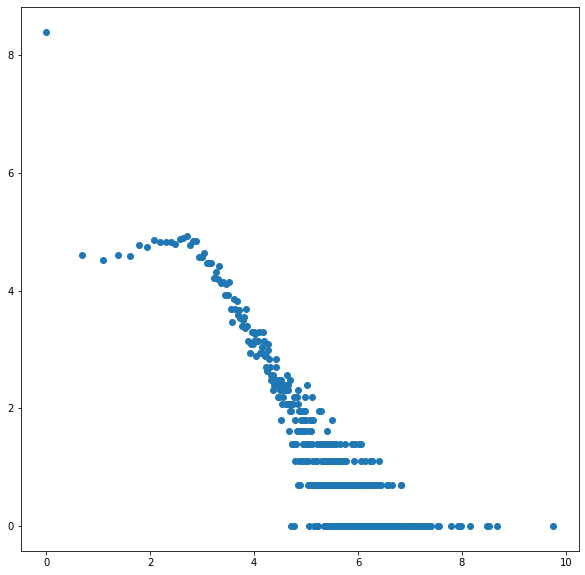

In [12]:
plt.rcParams['figure.figsize'] = [10,10]
xlog = np.log(lst)
ylog = np.log(list(dict.values()))
plt.scatter(xlog, ylog)

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.)

If we look at 14 focus crimes that results in
$$\frac{14\times13}{2}=91$$

pairwise comparisons. So we can display them all in a $7$ by $13$ matrix of plots. You can use matplotlib's `subplot` to organize those plots. With $7$ across and $13$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.

*Exercise*:
> Create the 91 scatterplots.
> * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
> * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

In [13]:
focuscrimes = list(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [14]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

weekdays_multipliers = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6
}
df["WeekHours"] = df.apply(lambda row: weekdays_multipliers[row["DayOfWeek"]]*24 + row["Hour"], axis=1)

In [53]:
def plot_comparison(column,order, df):
    k = df.groupby("Category")[column].value_counts()
    l = 1
    for i in range(14):
        if i == 13:
            break
            
        else:
            for j in range(i + 1,14):
                x = k[focuscrimes[i]].reindex(index=order, fill_value=0)
                y = k[focuscrimes[j]].reindex(index=order, fill_value=0)

                a = (sum(x*y)- sum(x*y)/168) /(sum(np.square(x))-sum(np.square(x))/168)
                b = sum(y)/168 - a*sum(x)/168
                x_vals = np.linspace(min(x),max(x),1000)
                y_vals = a * x_vals + b
                
                plt.subplot(7,13,l)
                plt.plot(x_vals,y_vals,color = 'red',linestyle='dashed')
                
                cm = plt.cm.get_cmap('RdBu')
                plt.scatter(x,y, c=[i for i in range(168)],cmap=cm)
                
                if focuscrimes[i] == 'DRIVING UNDER THE INFLUENCE':
                    plt.xlabel('DRIVING',fontsize = 8)
                else:
                    plt.xlabel(focuscrimes[i],fontsize = 8)
                    
                plt.ylabel(focuscrimes[j],fontsize = 8,labelpad=1)
                plt.xticks([])
                plt.yticks([])
                l += 1
        
        

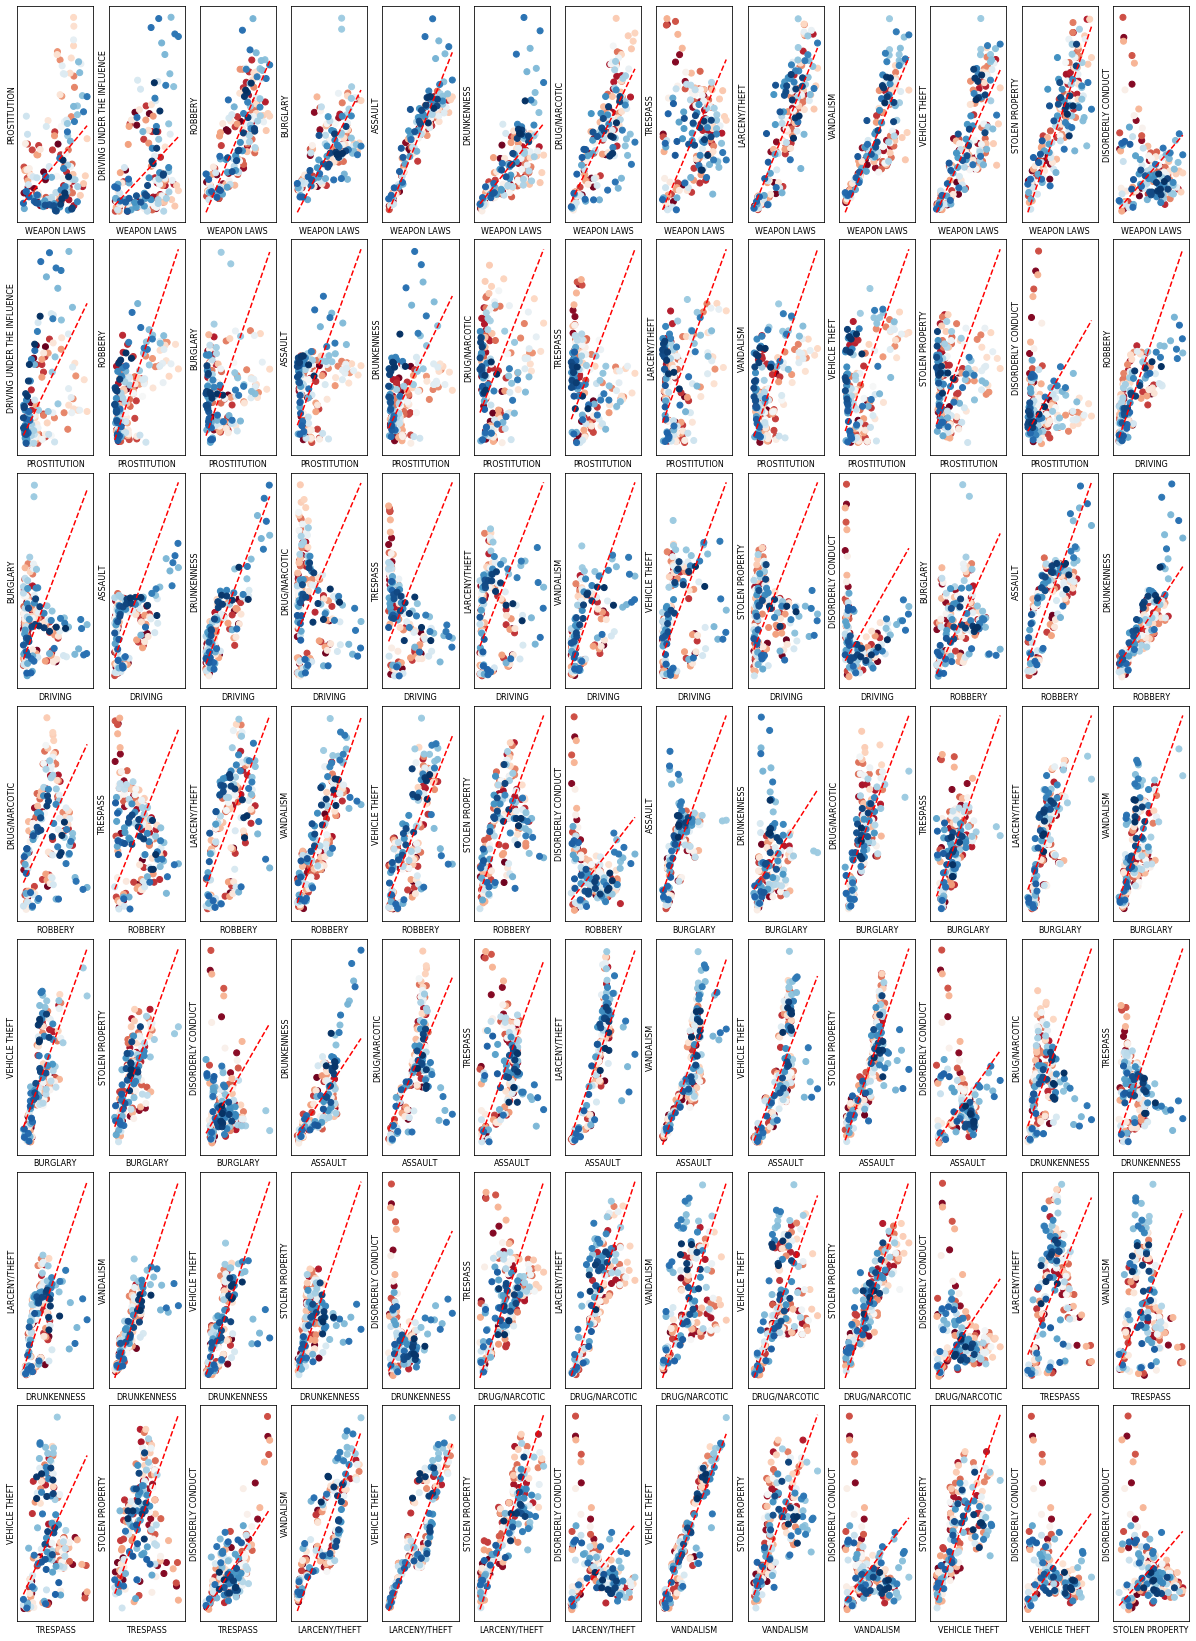

In [54]:
plt.rcParams['figure.figsize'] = [21 ,29.7]
plot_comparison('WeekHours', [i for i in range(168)],df)
plt.subplots_adjust(hspace =0.08)

{'ASSAULT vs ROBBERY': 0.5707369633561974}

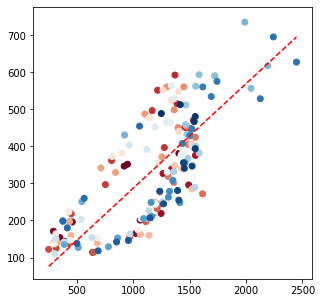

In [68]:
# plt.rcParams['figure.figsize'] = [5,5]
# k = df.groupby("Category")['WeekHours'].value_counts()
# x = k['ASSAULT'].reindex(index= [i for i in range(168)], fill_value=0)
# y = k['ROBBERY'].reindex(index= [i for i in range(168)], fill_value=0)
# a = (sum(x*y)- sum(x*y)/168) /(sum(np.square(x))-sum(np.square(x))/168)
# b = sum(y)/168 - a*sum(x)/168
# x_vals = np.linspace(min(x),max(x),1000)
# y_vals = a * x_vals + b
# plt.plot(x_vals,y_vals,color = 'red',linestyle='dashed')
# cm = plt.cm.get_cmap('RdBu')
# plt.scatter(x,y,c=[i for i in range(168)],cmap=cm)
# dict = {}
# SS_tot = sum(np.square(y -np.mean(y)))
# SS_res = sum(np.square(y - (a*x+b)))
# R_2 = 1 - SS_res/SS_tot
# dict['ASSAULT'+' vs '+ 'ROBBERY'] = R_2
# dict

In [75]:
def get_R_2(column,order, df):
    k = df.groupby("Category")[column].value_counts()
    l = 1
    dict = {}
    for i in range(14):
        if i == 13:
            break
            
        else:
            for j in range(i + 1,14):
                x = k[focuscrimes[i]].reindex(index=order, fill_value=0)
                y = k[focuscrimes[j]].reindex(index=order, fill_value=0)
                
                a = (sum(x*y)- sum(x*y)/168) /(sum(np.square(x))-sum(np.square(x))/168)
                b = sum(y)/168 - a*sum(x)/168
                SS_tot = sum(np.square(y -np.mean(y)))
                SS_res = sum(np.square(y - (a*x+b)))
                R_2 = 1 - SS_res/SS_tot
                dict[focuscrimes[i] + ' vs ' + focuscrimes[j] ] =R_2
                l += 1
                
    return dict

new_dict = get_R_2('WeekHours', [i for i in range(168)],df)

In [87]:
best_fit = [m for m,k in new_dict.items()   if  k == max(new_dict.values())]
least_fit = [m for m,k in new_dict.items()   if  k == min(new_dict.values())]
print('the most similar temporal pattern')
print(best_fit)
print('the least similar temporal pattern')
print(least_fit)

the most similar temporal pattern
['VANDALISM vs VEHICLE THEFT']
the least similar temporal pattern
['DRIVING UNDER THE INFLUENCE vs TRESPASS']
